## https://github.com/fastai/fastbook/blob/master/01_intro.ipynb

In [6]:
from fastai2.vision.all import *

In [7]:
#import ipywidgets as widgets

In [8]:
path = untar_data(URLs.PETS)/'images'

item_tfms are applied to each item (in this case, each item is resized to a 224-pixel square), while batch_tfms are applied to a batch of items at a time using the GPU, so they're particularly fast
Why 224 pixels? This is the standard size for historical reasons (old pretrained models require this size exactly), but you can pass pretty much anything. If you increase the size, you'll often get a model with better results (since it will be able to focus on more details), but at the price of speed and memory consumption; the opposite is true if you decrease the size.

learn = cnn_learner(dls, resnet34, metrics=error_rate)

The fifth line of the code training our image recognizer tells fastai to create a convolutional neural network (CNN) and specifies what architecture to use (i.e. what kind of model to create), what data we want to train it on, and what metric to use

When using a pretrained model, cnn_learner will remove the last layer, since that is always specifically customized to the original training task (i.e. ImageNet dataset classification), and replace it with one or more new layers with randomized weights, of an appropriate size for the dataset you are working with. This last part of the model is known as the head.


learn.fine_tune(1)  --  Transfer Learning
learn.fit()         --  weights fully updated

In [9]:
path.ls()

(#7393) [Path('images/havanese_26.jpg'),Path('images/yorkshire_terrier_10.jpg'),Path('images/pomeranian_18.jpg'),Path('images/Siamese_130.jpg'),Path('images/pug_103.jpg'),Path('images/beagle_83.jpg'),Path('images/basset_hound_120.jpg'),Path('images/Siamese_207.jpg'),Path('images/beagle_22.jpg'),Path('images/english_setter_180.jpg')...]

In [10]:
def is_cat(x): return x[0].isupper()

In [21]:
path.ls()[0].name[0]

'h'

In [31]:
get_image_files(path)[0].name

'havanese_26.jpg'

In [32]:
help(get_image_files)

Help on function get_image_files in module fastai2.data.transforms:

get_image_files(path, recurse=True, folders=None)
    Get image files in `path` recursively, only in `folders`, if specified.



In [26]:
# get_image_files(path) = path.ls()
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [28]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

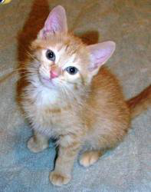

In [6]:
img = PILImage.create('chapter1_cat_example.jpg')
img.to_thumb(192)

#hide_output
for google CoLab only
uploader = widgets.FileUpload()
uploader

In [10]:
#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['chapter1_cat_example.jpg'])    # SimpleNamespace -- python empty Class, 
                                                                   # so the Class uploader is created here

In [11]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [15]:
doc(ImageDataLoaders)

ImageDataLoaders(*loaders, path='.', device=None)
Basic wrapper around several `DataLoader`s with factory methods for computer vision problems

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [19]:
from fastai2.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.516794,1.419499,00:00


epoch,train_loss,valid_loss,time
0,1.368612,1.361971,00:00
1,1.261723,1.183918,00:00
2,1.025093,0.874740,00:00
3,0.802997,0.721662,00:00
4,0.696555,0.679735,00:00
5,0.646596,0.664756,00:00
6,0.616985,0.659459,00:00
7,0.618350,0.655575,00:00
8,0.609965,0.654684,00:00
9,0.613525,0.654476,00:00


#### EmbeddingDotBias
#### torch.dot(user_w, item_w) + user_b + item_b

In [20]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,75.0,24.0,4.0,3.684024
1,66.0,37.0,4.0,3.746346
2,71.0,64.0,3.5,4.117081
3,9.0,5.0,2.5,3.252576
4,7.0,70.0,5.0,3.705755
5,92.0,60.0,4.5,4.291336
6,97.0,40.0,3.5,3.368422
7,97.0,87.0,4.0,3.397594
8,66.0,3.0,4.0,4.066998


# From Model to Production
https://github.com/fastai/fastbook/blob/master/02_production.ipynb

In [33]:
from utils import *
from fastai2.vision.widgets import *
from bing_image_downloader import downloader

In [8]:
downloader.download('grizzly', limit=30,  output_dir='dataset', adult_filter_off=True, force_replace=False)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly+Bear+Wildlife.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/GrizzlyBearJeanBeaufort.jpg/1200px-GrizzlyBearJeanBeaufort.jpg
[Error]Invalid image, not saving https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/GrizzlyBearJeanBeaufort.jpg/1200px-GrizzlyBearJeanBeaufort.jpg

[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/GrizzlyBearJeanBeaufort.jpg/1200px-GrizzlyBearJeanBeaufort.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #2 from https://i.ytimg.com/vi/4dXxojR818w/hqdefault.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Grizzly_Denali_Crop.jpg/1200px-Grizzly_Denali_Crop.jpg
[%] File Downloaded !

[%] Downloading Image #4 

In [ ]:
downloader.download('grizzly', limit=30,  output_dir='dataset', adult_filter_off=True, force_replace=False)

In [34]:
downloader.download('black_bear', limit=30,  output_dir='dataset', adult_filter_off=True, force_replace=False)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/0/08/01_Schwarzb%C3%A4r.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.gannett-cdn.com/-mm-/550ced00e5b12e2e6e7cb218b757902c6827874b/c=0-213-4288-2636&amp;r=x1683&amp;c=3200x1680/local/-/media/2017/03/22/CarolinaGroup/Asheville/636257813777562324-Black-bear-Getty-images.jpg
[!] Issue getting: https://www.gannett-cdn.com/-mm-/550ced00e5b12e2e6e7cb218b757902c6827874b/c=0-213-4288-2636&amp;r=x1683&amp;c=3200x1680/local/-/media/2017/03/22/CarolinaGroup/Asheville/636257813777562324-Black-bear-Getty-images.jpg
[!] Error:: HTTP Error 403: Forbidden
[%] Downloading Image #2 from https://www.farmersalmanac.com/wp-content/uploads/2013/04/Spring-Bears-Awake-i635725340.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from http://1.bp.blogspot.com/-b7sFNGQgIYc/UOQamD0r_DI/AAAAAAAAGrQ/kUZw_U4pm68/s1600/American_Black_Bear1.JPG
[%] File Down

In [35]:
downloader.download('teddy_bear', limit=30,  output_dir='dataset', adult_filter_off=True, force_replace=False)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://i.ytimg.com/vi/7_n3joTorlI/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://4.bp.blogspot.com/_IQv35l-het8/TVLoBXL_RAI/AAAAAAAAAG0/6sAohWVS5No/s1600/Teddy-Bear-Wallpapers-28.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.ytimg.com/vi/m_0TE_wnrXw/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://1.bp.blogspot.com/_E7ik4q_NXFA/TERibBZi3QI/AAAAAAAAAGs/vpK23Q6qj-8/s1600/teddybear20.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://1.bp.blogspot.com/-ZUZVjrAa000/T3qG0b-zdjI/AAAAAAAABrg/Xn_IfYSPYNw/s1600/Teddy+Bear+Wallpapers+1.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.ytimg.com/vi/GXGIDgbpE-U/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/10teddybears.jpg/1200px-10teddybears.jpg
[%] File Downloaded !


In [36]:
path = Path('dataset')

In [38]:
get_image_files(path)

(#90) [Path('dataset/grizzly/Image_29.jpg'),Path('dataset/grizzly/Image_15.jpg'),Path('dataset/grizzly/Image_22.jpg'),Path('dataset/grizzly/Image_6.jpg'),Path('dataset/grizzly/Image_27.jpg'),Path('dataset/grizzly/Image_9.jpg'),Path('dataset/grizzly/Image_19.jpg'),Path('dataset/grizzly/Image_1.jpg'),Path('dataset/grizzly/Image_14.jpg'),Path('dataset/grizzly/Image_5.jpg')...]

In [49]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,                        # For this DataLoaders our underlying items will be file paths. We have to tell fastai how to get a list of those files. The get_image_files function takes a path, and returns a list of all of the images in that path (recursively, by default):
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,  # parent_label is a function )see below
    item_tfms=Resize(128))

In [48]:
parent_label(get_image_files(path)[0])

'grizzly'

In [50]:
dls = bears.dataloaders(path)

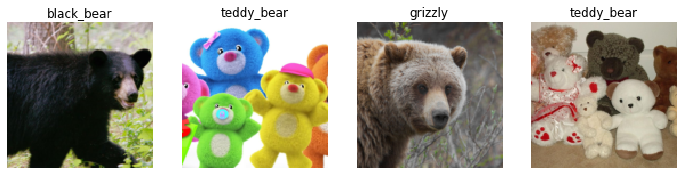

In [51]:
dls.valid.show_batch(max_n=4, nrows=1)

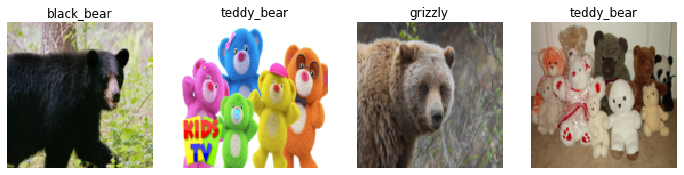

In [52]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

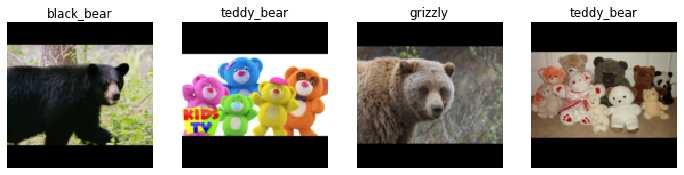

In [54]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

All of these approaches seem somewhat wasteful, or problematic. If we squish or stretch the images they end up as unrealistic shapes, leading to a model that learns that things look different to how they actually are, which we would expect to result in lower accuracy. If we crop the images then we remove some of the features that allow us to perform recognition. For instance, if we were trying to recognize breeds of dog or cat, we might end up cropping out a key part of the body or the face necessary to distinguish between similar breeds. If we pad the images then we have a whole lot of empty space, which is just wasted computation for our model and results in a lower effective resolution for the part of the image we actually use.

Instead, what we normally do in practice is to randomly select part of the image, and crop to just that part. On each epoch (which is one complete pass through all of our images in the dataset) we randomly select a different part of each image. This means that our model can learn to focus on, and recognize, different features in our images. It also reflects how images work in the real world: different photos of the same thing may be framed in slightly different ways.

In fact, an entirely untrained neural network knows nothing whatsoever about how images behave. It doesn't even recognize that when an object is rotated by one degree, it still is a picture of the same thing! So actually training the neural network with examples of images where the objects are in slightly different places and slightly different sizes helps it to understand the basic concept of what an object is, and how it can be represented in an image.

Here's another example where we replace Resize with RandomResizedCrop, which is the transform that provides the behavior we just described. The most important parameter to pass in is min_scale, which determines how much of the image to select at minimum each time:

We used unique=True to have the same image repeated with different versions of this RandomResizedCrop transform. This is a specific example of a more general technique, called data augmentation.

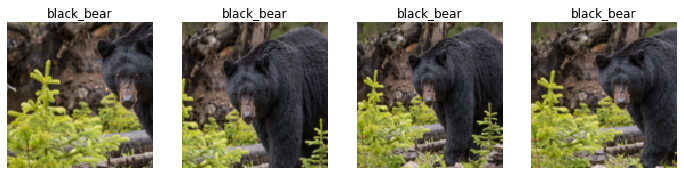

In [55]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

## Data Augmentation

Data augmentation refers to creating random variations of our input data, such that they appear different, but do not actually change the meaning of the data. Examples of common data augmentation techniques for images are rotation, flipping, perspective warping, brightness changes and contrast changes. For natural photo images such as the ones we are using here, a standard set of augmentations that we have found work pretty well are provided with the aug_transforms function. Because our images are now all the same size, we can apply these augmentations to an entire batch of them using the GPU, which will save a lot of time. To tell fastai we want to use these transforms on a batch, we use the batch_tfms parameter (note that we're not using RandomResizedCrop in this example, so you can see the differences more clearly; we're also using double the amount of augmentation compared to the default, for the same reason):

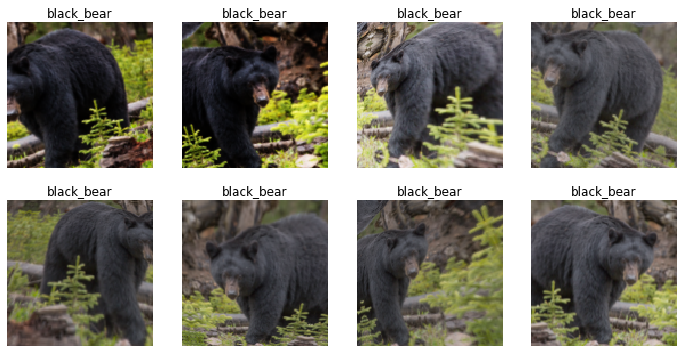

In [56]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

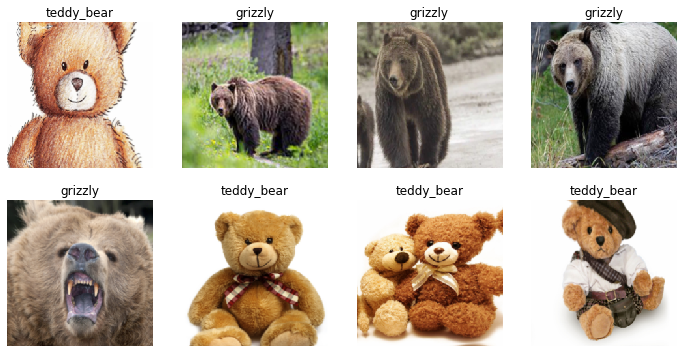

In [60]:
dls.train.show_batch(max_n=8, nrows=2)

We don't have a lot of data for our problem (150 pictures of each sort of bear at most), so to train our model, we'll use RandomResizedCrop with an image size of 224 px, which is fairly standard for image classification, and default aug_transforms:

In [57]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [58]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.011266,4.288508,0.611111,00:09


epoch,train_loss,valid_loss,error_rate,time
0,1.991061,3.002278,0.500000,00:10
1,1.725381,1.680289,0.388889,00:11
2,1.278026,0.734538,0.277778,00:11
3,0.994174,0.392225,0.222222,00:11


In [59]:
learn.fine_tune(12)

epoch,train_loss,valid_loss,error_rate,time
0,0.114254,0.284745,0.166667,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.122242,0.148556,0.111111,00:11
1,0.100427,0.106833,0.055556,00:11
2,0.076315,0.086002,0.055556,00:10
3,0.061817,0.068716,0.055556,00:11
4,0.052798,0.049281,0.000000,00:11
5,0.046000,0.036501,0.000000,00:11
6,0.039741,0.027009,0.000000,00:11
7,0.034825,0.020327,0.000000,00:11
8,0.030866,0.016269,0.000000,00:11
9,0.027773,0.013083,0.000000,00:11


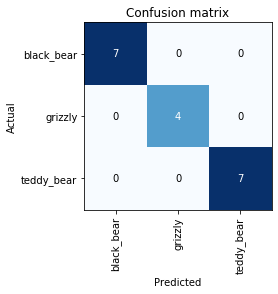

In [61]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### Try to predict something

In [62]:
learn.predict('grizzly.jpg') # True

('grizzly', tensor(1), tensor([1.4077e-06, 9.9980e-01, 2.0167e-04]))

In [63]:
learn.predict('29152412_boo-being-majestic.jpg-.jpg') # True

('grizzly', tensor(1), tensor([8.8272e-06, 9.9980e-01, 1.8722e-04]))

In [64]:
learn.predict('bb.jpg') # True

('black_bear', tensor(0), tensor([9.5925e-01, 4.0538e-02, 2.0869e-04]))

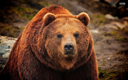

In [17]:
im = Image.open(dest)
im.to_thumb(128,128)

In [24]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [ ]:
def label_func(fname):
    return "cat" if fname.name[0].isupper() else "dog"

In [48]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=label_func,
    item_tfms=Resize(32))

NameError: name 'label_func' is not defined

In [40]:
path = Path('dataset/grizzly')
dls = bears.dataloaders(path)

In [47]:
dls.valid.show_batch()

## Pet Breeds
https://github.com/fastai/fastbook/blob/master/05_pet_breeds.ipynb

In [1]:
from utils import *
from fastai2.vision.all import *
path = untar_data(URLs.PETS)
%matplotlib inline

/jet/var/python/lib/python3.6/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [3]:
# To see what is in our dataset we can use the ls method:
Path.BASE_PATH = path

In [4]:
path.ls()

(#2) [Path('images'),Path('annotations')]


We can see that this dataset provides us with images and annotations directories. The website for the dataset tells us that the annotations directory contains information about where the pets are rather than what they are. In this chapter, we will be doing classification, not localization, which is to say that we care about what the pets are, not where they are. Therefore, we will ignore the annotations directory for now. So, let's have a look inside the images directory:

In [5]:
(path/"images").ls()  # list the files in directory "images"    #7393 in the beginning - the length of list

(#7393) [Path('images/havanese_26.jpg'),Path('images/yorkshire_terrier_10.jpg'),Path('images/pomeranian_18.jpg'),Path('images/Siamese_130.jpg'),Path('images/pug_103.jpg'),Path('images/beagle_83.jpg'),Path('images/basset_hound_120.jpg'),Path('images/Siamese_207.jpg'),Path('images/beagle_22.jpg'),Path('images/english_setter_180.jpg')...]

In [10]:
fname = (path/"images").ls()[0]

In [13]:
type(fname)

pathlib.PosixPath

In [14]:
# to get the name from the path use .name
print(fname)
print(fname.name)

/jet/.fastai/data/oxford-iiit-pet/images/havanese_26.jpg
havanese_26.jpg


In [15]:
re.findall(r'(.+)_\d+.jpg$', (path/"images").ls()[0].name)

['havanese']

Now that we confirmed the regular expression works for the example, let's use it to label the whole dataset. fastai comes with many classes to help with labeling. For labeling with regular expressions, we can use the RegexLabeller class

In [17]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),   # RegexLabeller  -- fastai Class
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

item_tfms=Resize(460),

batch_tfms=aug_transforms(size=224, min_scale=0.75)

These lines implement a fastai data augmentation strategy which we call presizing. Presizing is a particular way to do image augmentation that is designed to minimize data destruction while maintaining good performance.

To work around these challenges, presizing adopts two strategies that are shown in <

Resize images to relatively "large" dimensions—that is, dimensions significantly larger than the target training dimensions.
Compose all of the common augmentation operations (including a resize to the final target size) into one, and perform the combined operation on the GPU only once at the end of processing, rather than performing the operations individually and interpolating multiple times.
The first step, the resize, creates images large enough that they have spare margin to allow further augmentation transforms on their inner regions without creating empty zones. This transformation works by resizing to a square, using a large crop size. On the training set, the crop area is chosen randomly, and the size of the crop is selected to cover the entire width or height of the image, whichever is smaller.

In the second step, the GPU is used for all data augmentation, and all of the potentially destructive operations are done together, with a single interpolation at the end.

This picture shows the two steps:

Crop full width or height: This is in item_tfms, so it's applied to each individual image before it is copied to the GPU. It's used to ensure all images are the same size. On the training set, the crop area is chosen randomly. On the validation set, the center square of the image is always chosen.
Random crop and augment: This is in batch_tfms, so it's applied to a batch all at once on the GPU, which means it's fast. On the validation set, only the resize to the final size needed for the model is done here. On the training set, the random crop and any other augmentations are done first.
To implement this process in fastai you use Resize as an item transform with a large size, and RandomResizedCrop as a batch transform with a smaller size. RandomResizedCrop will be added for you if you include the min_scale parameter in your aug_transforms function, as was done in the DataBlock call in the previous section. Alternatively, you can use pad or squish instead of crop (the default) for the initial Resize.

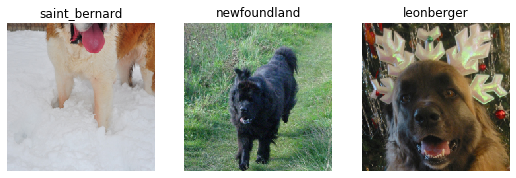

In [26]:
# do not forget %matplotlib inline to show the pictures
dls.show_batch(nrows=1, ncols=3)

In [25]:
doc(dls.show_batch)

TfmdDL.show_batch(b=None, max_n=9, ctxs=None, show=True, unique=False, **kwargs)
None

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


Do not forget to do Resize Transform. In other case there will be an error during the batch making

You can see exactly how we gathered the data and split it, how we went from a filename to a sample (the tuple (image, category)), then what item transforms were applied and how it failed to collate those samples in a batch (because of the different shape

In [27]:
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /jet/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_55.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x333
  Pipeline: partial -> Categorize
    starting from
      /jet/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_55.jpg
    applying partial gives
      staffordshire_bull_terrier
    applying Categorize gives
      TensorCategory(34)

Final sample: (PILImage mode=RGB size=500x333, TensorCategory(34))


Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: ToTensor
    starting from
      (PILImage mode=RGB size=500x333, TensorCategory(34))
    applying T

RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 333 and 335 in dimension 2 at /pytorch/aten/src/TH/generic/THTensor.cpp:612

In [28]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.533731,0.384629,0.119080,11:00


epoch,train_loss,valid_loss,error_rate,time
0,0.501907,0.338042,0.114344,15:29
1,0.334167,0.249079,0.079838,15:15


To actually get a batch of real data from our DataLoaders, we can use the one_batch method:

In [29]:
x,y = dls.one_batch()

In [30]:
y
#Our batch size is 64, so we have 64 rows in this tensor. 
#Each row is a single integer between 0 and 36, representing our 37 possible pet breeds. 

TensorCategory([ 0, 28, 32, 14,  6, 28, 19, 32, 16, 28,  4, 16, 18, 24, 29, 24, 25, 11,
        19,  0,  5, 22, 36, 12, 34, 25,  7, 11,  6, 33, 34,  3,  1,  9, 36,  6,
        27, 11,  2, 17, 22, 29, 27, 29, 14,  0, 26, 12, 30,  8, 14,  3, 25,  2,
        25,  1, 35, 26, 11, 28, 33, 30, 12,  5])

In [31]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0] # show the prediction probabilyties

tensor([9.9627e-01, 2.1058e-04, 4.8680e-06, 1.1399e-05, 1.5692e-04, 5.9287e-05,
        4.1300e-04, 1.0877e-06, 1.3167e-03, 2.8451e-05, 6.5170e-05, 4.2952e-06,
        4.0000e-07, 8.1146e-07, 1.7830e-06, 3.0129e-06, 9.9918e-08, 2.0955e-04,
        8.3164e-07, 8.3449e-07, 1.3856e-06, 1.4755e-06, 1.2629e-07, 3.0875e-07,
        6.9163e-07, 9.6639e-06, 2.3077e-05, 5.4638e-07, 1.1002e-04, 6.3565e-07,
        3.4234e-07, 9.7160e-07, 1.6706e-07, 1.0893e-03, 9.9508e-07, 1.5198e-06,
        1.4528e-06])

In [32]:
len(preds[0]),preds[0].sum()

(37, tensor(1.))

In [34]:
preds.shape   # batch with 64 values, for each value there are 37 prediction prob.

torch.Size([64, 37])

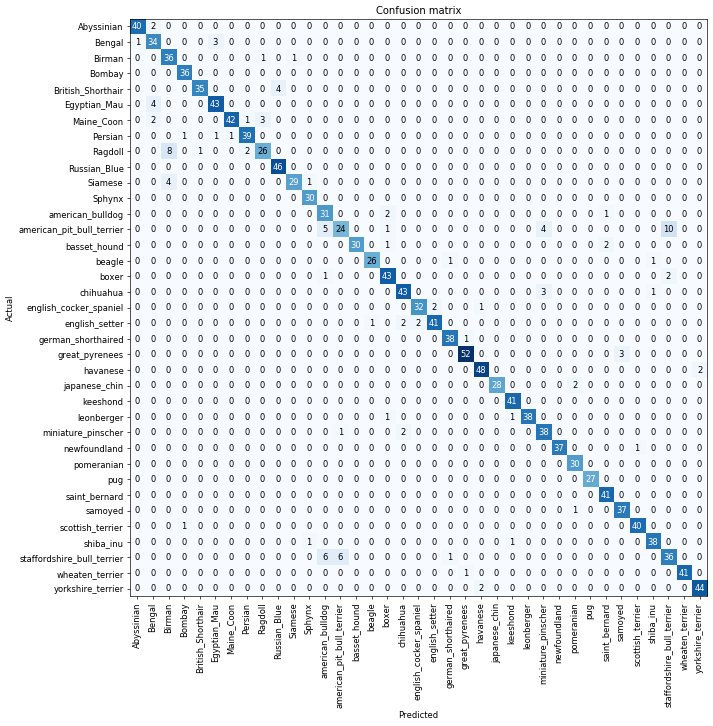

In [35]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

we can use the most_confused method, which just shows us the cells of the confusion matrix with the most incorrect predictions (here, with at least 5 or more):

In [36]:
interp.most_confused(min_val=5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 10),
 ('Ragdoll', 'Birman', 8),
 ('staffordshire_bull_terrier', 'american_bulldog', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('american_pit_bull_terrier', 'american_bulldog', 5)]

### Improving Our Model¶
We will now look at a range of techniques to improve the training of our model and make it better. While doing so, we will explain a little bit more about transfer learning and how to fine-tune our pretrained model as best as possible, without breaking the pretrained weights.

The first thing we need to set when training a model is the learning rate. We saw in the previous chapter that it needs to be just right to train as efficiently as possible, so how do we pick a good one? fastai provides a tool for this.

### The Learning Rate Finder

What do we do to find the perfect learning rate—not too high, and not too low? In 2015 the researcher Leslie Smith came up with a brilliant idea, called the learning rate finder. His idea was to start with a very, very small learning rate, something so small that we would never expect it to be too big to handle. We use that for one mini-batch, find what the losses are afterwards, and then increase the learning rate by some percentage (e.g., doubling it each time). Then we do another mini-batch, track the loss, and double the learning rate again. We keep doing this until the loss gets worse, instead of better. This is the point where we know we have gone too far. We then select a learning rate a bit lower than this point. Our advice is to pick either:

One order of magnitude less than where the minimum loss was achieved (i.e., the minimum divided by 10)
The last point where the loss was clearly decreasing
The learning rate finder computes those points on the curve to help you. Both these rules usually give around the same value. In the first chapter, we didn't specify a learning rate, using the default value from the fastai library (which is 1e-3):

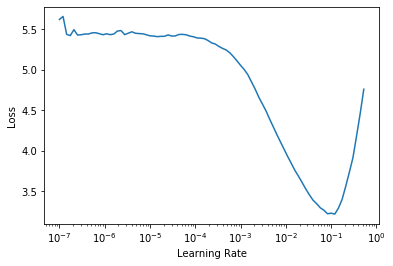

In [37]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [38]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.20e-02, steepest point: 3.63e-03


We can see on this plot that in the range 1e-6 to 1e-3, nothing really happens and the model doesn't train. Then the loss starts to decrease until it reaches a minimum, and then increases again. We don't want a learning rate greater than 1e-1 as it will give a training that diverges like the one before (you can try for yourself), but 1e-1 is already too high: at this stage we've left the period where the loss was decreasing steadily.

In this learning rate plot it appears that a learning rate around 3e-3 would be appropriate, so let's choose that:

In [39]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.299792,0.370230,0.108931,11:24


epoch,train_loss,valid_loss,error_rate,time
0,0.538046,0.345508,0.112314,15:28
1,0.331776,0.243149,0.072395,15:05


In [40]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))  # fit_one_cycle  -- lr is changed to the max_lr = 1e-6

epoch,train_loss,valid_loss,error_rate,time
0,1.131570,0.325465,0.109608,10:58
1,0.526751,0.279589,0.085927,10:11
2,0.314889,0.245688,0.079161,11:06


KeyboardInterrupt: 